In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
sess = tf.Session()
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)

In [2]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))

In [3]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [4]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
tA_A_inv = tf.matrix_inverse(tA_A)
product = tf.matmul(tA_A_inv, tf.transpose(A_tensor))
solution = tf.matmul(product, b_tensor)
solution_eval = sess.run(solution)

In [5]:
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))

slope: 0.9905609633363899
y_intercept: 0.043145599930154016


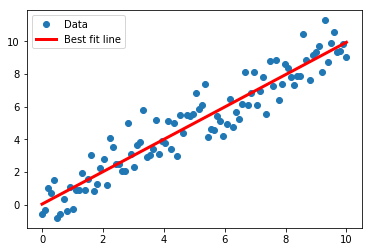

In [6]:
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [7]:
print(solution_eval)

[[0.99056096]
 [0.0431456 ]]


In [3]:
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
x_vals = np.linspace(0, 10, 100)
y_vals = x_vals + np.random.normal(0, 1, 100)
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 100)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

In [4]:
tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
tA_b = tf.matmul(tf.transpose(A_tensor), b)
sol1 = tf.matrix_solve(L, tA_b)
sol2 = tf.matrix_solve(tf.transpose(L), sol1)

In [5]:
solution_eval = sess.run(sol2)
slope = solution_eval[0][0]
y_intercept = solution_eval[1][0]
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))


slope: 0.9935450566335895
y_intercept: 0.04268881974349107


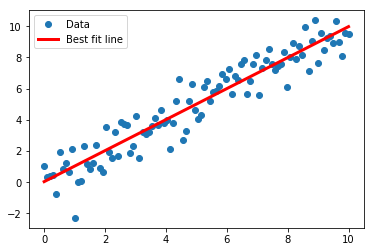

In [6]:
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.show()

In [2]:
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])


In [4]:
print(x_vals[0: 10])
print(y_vals[0: 10])

[0.2 0.2 0.2 0.2 0.2 0.4 0.3 0.2 0.2 0.1]
[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9]


In [5]:
learning_rate = 0.05
batch_size = 25
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

In [6]:
model_output = tf.add(tf.matmul(x_data, A), b)

In [7]:
loss = tf.reduce_mean(tf.square(y_target - model_output))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [13]:
rand_index = np.random.choice(len(x_vals), size=batch_size)
print(rand_index)
rand_x = np.array([x_vals[rand_index]])
print(rand_x.shape)

[ 78  71 140  16  94  96  22  86 132  33 149  59  12  47  77  93  22  96
 130   0  46  99  81  88 135]
(1, 25)


In [14]:
loss_vec = []
for i in range(100):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    if (i + 1) % 25 == 0:
        print('Step #' + str(i + 1) + 'A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #25A = [[2.0114026]]b = [[3.2038286]]
Loss = 1.1583437
Step #50A = [[1.5254254]]b = [[3.8419037]]
Loss = 0.6201182
Step #75A = [[1.2692621]]b = [[4.1785965]]
Loss = 0.3047068
Step #100A = [[1.1377438]]b = [[4.417402]]
Loss = 0.24771637


In [15]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)

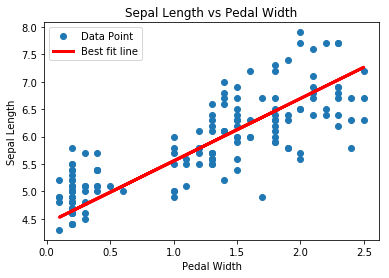

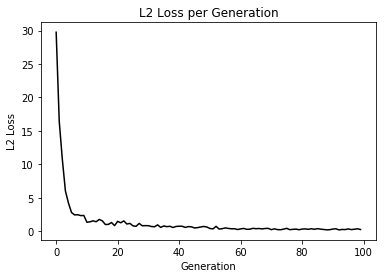

In [16]:
plt.plot(x_vals, y_vals, 'o', label='Data Point')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()
plt.plot(loss_vec, 'k-')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.show()

In [20]:
print(np.array(loss_vec).shape)

(100,)


In [31]:
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 25
learning_rate = 0.1
iterations = 100
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A_l1 = tf.Variable(tf.random_normal(shape=[1, 1]))
b_l1 = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.add(tf.matmul(x_data, A_l1), b_l1)

In [32]:
loss_l1 = tf.reduce_mean(tf.abs(y_target - model_output))

In [33]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt_l1 = tf.train.GradientDescentOptimizer(learning_rate)
train_step_l1 = my_opt_l1.minimize(loss_l1)
loss_vec_l1 = []
for i in range(iterations):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss_l1 = sess.run(loss_l1, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec_l1.append(temp_loss_l1)
    if (i + 1) % 25 == 0:
        print('Step #' + str(i + 1) + '_l1A = ' + str(sess.run(A_l1)) + 'b_l1 = ' + str(sess.run(b_l1)))

Step #25_l1A = [[1.9641539]]b_l1 = [[2.5876694]]
Step #50_l1A = [[1.7409536]]b_l1 = [[3.3516695]]
Step #75_l1A = [[1.4369537]]b_l1 = [[4.05167]]
Step #100_l1A = [[1.0857537]]b_l1 = [[4.5436687]]


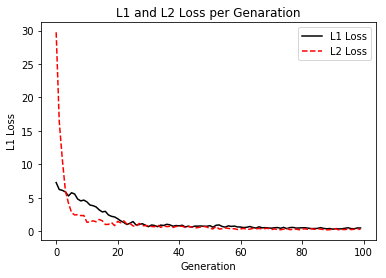

In [34]:
plt.plot(loss_vec_l1, 'k-', label='L1 Loss')
plt.plot(loss_vec, 'r--', label = 'L2 Loss')
plt.title('L1 and L2 Loss per Genaration')
plt.xlabel('Generation')
plt.ylabel('L1 Loss')
plt.legend(loc='upper right')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [3]:
demming_numerator = tf.abs(tf.subtract(y_target, tf.add(tf.matmul(x_data, A), b)))
demming_denominator = tf.sqrt(tf.add(tf.square(A), 1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

In [8]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.1)
train_step = my_opt.minimize(loss)
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    if (i + 1) % 50 == 0:
        print('Step #' + str(i + 1) + 'A = ' + str(sess.run(A)) + 'b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #50A = [[3.0244157]]b = [[1.7056297]]
Loss = 0.44849527
Step #100A = [[2.9983892]]b = [[1.8889422]]
Loss = 0.3452543
Step #150A = [[2.8855863]]b = [[2.0397954]]
Loss = 0.46896842
Step #200A = [[2.7488842]]b = [[2.1714773]]
Loss = 0.45457
Step #250A = [[2.6770108]]b = [[2.3513246]]
Loss = 0.43704125
Step #300A = [[2.5537338]]b = [[2.5055532]]
Loss = 0.41932765
Step #350A = [[2.4433928]]b = [[2.6804342]]
Loss = 0.4665715
Step #400A = [[2.3215008]]b = [[2.8811972]]
Loss = 0.4674586
Step #450A = [[2.1629605]]b = [[3.093818]]
Loss = 0.45938903
Step #500A = [[1.9573622]]b = [[3.310695]]
Loss = 0.38988793
Step #550A = [[1.8246076]]b = [[3.5856318]]
Loss = 0.37244043
Step #600A = [[1.5688436]]b = [[3.8522093]]
Loss = 0.29506445
Step #650A = [[1.348313]]b = [[4.1684947]]
Loss = 0.3033032
Step #700A = [[1.1863885]]b = [[4.4207926]]
Loss = 0.25606388
Step #750A = [[1.0922946]]b = [[4.575093]]
Loss = 0.25830817
Step #800A = [[0.9967298]]b = [[4.599818]]
Loss = 0.2703046
Step #850A = [[1.00722

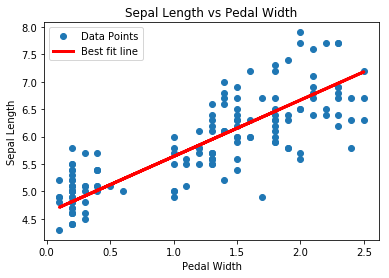

In [9]:
[slope] = sess.run(A)
[y_intercept] = sess.run(b)
best_fit = []
for i in x_vals:
    best_fit.append(slope * i + y_intercept)
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])
batch_size = 50
learning_rate = 0.001
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.add(tf.matmul(x_data, A), b)

D:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Colocations handled automatically by placer.


In [2]:
lasso_param = tf.constant(0.9)
heavyside_step = tf.truediv(1.0, tf.add(1.0, tf.exp(tf.multiply(-100.0, tf.subtract(A, lasso_param)))))
regularization_param = tf.multiply(heavyside_step, 99.0)
loss = tf.add(tf.reduce_mean(tf.square(y_target - model_output)), regularization_param)
# ridge_param = tf.constant(1.0)
# ridge_loss = tf.reduce_mean(tf.square(A))
# loss = tf.expand_dims(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), tf.multiply(ridge_param, ridge_loss)), 0)

In [3]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)

In [4]:
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    if (i + 1) % 300 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #300 A = [[0.8235593]] b = [[2.8805134]]
Loss = [[4.105111]]
Step #600 A = [[0.81775904]] b = [[3.774572]]
Loss = [[1.4813124]]
Step #900 A = [[0.8121886]] b = [[4.2681155]]
Loss = [[0.5429627]]
Step #1200 A = [[0.8073068]] b = [[4.5409517]]
Loss = [[0.4684763]]
Step #1500 A = [[0.8028883]] b = [[4.6962404]]
Loss = [[0.32267362]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
sess = tf.Session()

D:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
iris = datasets.load_iris()
x_vals = np.array([[x[1], x[2], x[3]] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])

In [4]:
batch_size = 50
learning_rate = 0.01
x_data = tf.placeholder(shape=[None, 3], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[3, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [5]:
elastic_param1 = tf.constant(1.0)
elastic_param2 = tf.constant(1.0)
l1_a_loss = tf.reduce_mean(tf.abs(A))
l2_a_loss = tf.reduce_mean(tf.square(A))
e1_term = tf.multiply(elastic_param1, l1_a_loss)
e2_term = tf.multiply(elastic_param2, l2_a_loss)
loss = tf.expand_dims(tf.add(tf.add(tf.reduce_mean(tf.square(y_target - model_output)), e1_term), e2_term), 0)

In [7]:
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(learning_rate)
train_step = my_opt.minimize(loss)
loss_vec = []
for i in range(1000):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = x_vals[rand_index]
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss[0])
    if (i + 1) % 250 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #250 A = [[0.8349313 ]
 [0.5624449 ]
 [0.00737191]] b = [[1.0451463]]
Loss = [0.9468905]
Step #500 A = [[0.68599325]
 [0.516535  ]
 [0.00077379]] b = [[1.6976805]]
Loss = [0.7539761]
Step #750 A = [[0.5439141 ]
 [0.49427232]
 [0.00320227]] b = [[2.2519317]]
Loss = [0.6111269]
Step #1000 A = [[0.43029642]
 [0.45574376]
 [0.0032391 ]] b = [[2.7219362]]
Loss = [0.54569244]


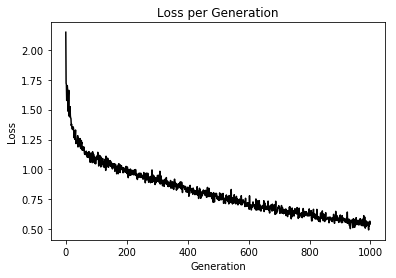

In [8]:
plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import requests
from sklearn import datasets
from sklearn.preprocessing import normalize

from tensorflow.python.framework import ops

In [10]:
ops.reset_default_graph()
sess = tf.Session()

In [29]:
# birthdata_url = 'http://faculty.washington.edu/heagerty/Courses/b513/WEB2002/datasets/lowbwt.dat'
# birth_file = requests.get(birthdata_url)
with open('lowbwt.txt', 'r') as file:
    birth_data = [[float(data) for data in line.strip('\n').split()] for line in file.readlines()]

In [32]:
print(birth_data)

[[85.0, 0.0, 19.0, 182.0, 2.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2523.0], [86.0, 0.0, 33.0, 155.0, 3.0, 0.0, 0.0, 0.0, 0.0, 3.0, 2551.0], [87.0, 0.0, 20.0, 105.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2557.0], [88.0, 0.0, 21.0, 108.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.0, 2594.0], [89.0, 0.0, 18.0, 107.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 2600.0], [91.0, 0.0, 21.0, 124.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2622.0], [92.0, 0.0, 22.0, 118.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2637.0], [93.0, 0.0, 17.0, 103.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2637.0], [94.0, 0.0, 29.0, 123.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 2663.0], [95.0, 0.0, 26.0, 113.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2665.0], [96.0, 0.0, 19.0, 95.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2722.0], [97.0, 0.0, 19.0, 150.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2733.0], [98.0, 0.0, 22.0, 95.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 2750.0], [99.0, 0.0, 30.0, 107.0, 3.0, 0.0, 1.0, 0.0, 1.0, 2.0, 2750.0], [100.0, 0.0, 18.0, 100.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2769.0], [101.0, 0.0, 18.0, 100.0, 1.0, 1.0, 0.0,

In [33]:
y_vals = np.array([x[1] for x in birth_data])
x_vals = np.array([x[2: 9] for x in birth_data])

In [34]:
print(y_vals)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [35]:
print(x_vals)

[[ 19. 182.   2. ...   0.   0.   1.]
 [ 33. 155.   3. ...   0.   0.   0.]
 [ 20. 105.   1. ...   0.   0.   0.]
 ...
 [ 23.  94.   3. ...   0.   0.   0.]
 [ 17. 142.   2. ...   0.   1.   0.]
 [ 21. 130.   1. ...   0.   1.   0.]]


In [36]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

In [37]:
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [38]:
def normalize_cols(m):
    col_max = m.max(axis=0)
    col_min = m.min(axis=0)
    return (m - col_min) / (col_max - col_min)

x_vals_train = np.nan_to_num(normalize_cols(x_vals_train))
x_vals_test = np.nan_to_num(normalize_cols(x_vals_test))

In [39]:
batch_size = 25
x_data = tf.placeholder(shape=[None, 7], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)
A = tf.Variable(tf.random_normal(shape=[7, 1]))

b = tf.Variable(tf.random_normal(shape=[1, 1]))
model_output = tf.add(tf.matmul(x_data, A), b)

In [41]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))
init = tf.global_variables_initializer()
sess.run(init)
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)

In [42]:
prediction = tf.round(tf.sigmoid(model_output))
predictions_correct = tf.cast(tf.equal(prediction, y_target), tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [43]:
loss_vec = []
train_acc = []
test_acc = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    temp_acc_train = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_acc.append(temp_acc_train)
    temp_acc_test = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_acc.append(temp_acc_test)

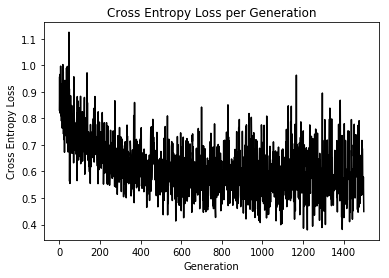

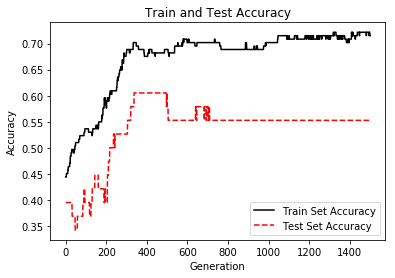

In [46]:
plt.plot(loss_vec, 'k-')
plt.title('Cross Entropy Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Cross Entropy Loss')
plt.show()
plt.plot(train_acc, 'k-', label='Train Set Accuracy')
plt.plot(test_acc, 'r--', label='Test Set Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()